In [23]:
import numpy as np 
import matplotlib.tri as tri
import matplotlib.pyplot as plt

In [175]:
data = np.load('../data/raw/has_original/circle_10_has_1000.npz')

In [176]:
for x in data.keys():
    print(x) 

ux
uy
p


In [177]:
data['ux'].shape

(2639,)

In [178]:
mesh = np.load('../data/raw/mesh/has/circle_10.npz')

In [179]:
for x in mesh.keys():
    print(x) 

x
y
edges
edge_properties


In [180]:
mesh['edges'].shape

(15352, 2)

In [181]:
# mesh['edge_properties'] This is length of the edge 
# mesh['edges'][5] 
# np.sqrt((mesh['x'][82] - mesh['x'][0])**2 + ((mesh['y'][82] - mesh['y'][0])**2))

In [182]:
from itertools import combinations

In [183]:
# Create a dictionary of neighbors
neighbors = {}
for edge in mesh['edges']:
    a, b = edge
    if a not in neighbors:
        neighbors[a] = set()
    if b not in neighbors:
        neighbors[b] = set()
    neighbors[a].add(b)
    neighbors[b].add(a)

# Find triangles by looking for sets of 3 connected points
triangles = []
for a in neighbors:
    for b, c in combinations(neighbors[a], 2):
        if b in neighbors[c]:
            triangles.append([a, b, c])

# Convert triangles to numpy array
triangles = np.array(triangles)

In [184]:
triangulation = tri.Triangulation(mesh['x'], mesh['y'], triangles=triangles)
dummy_triang = tri.Triangulation(mesh['x'], mesh['y'])

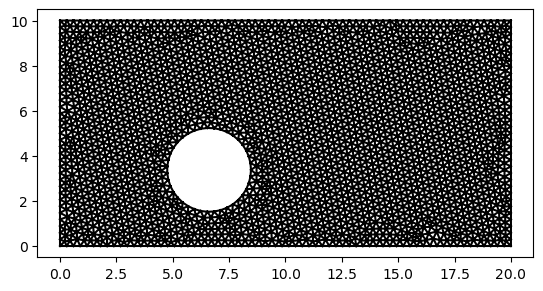

In [185]:

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax = plt.triplot(triangulation, '-k')


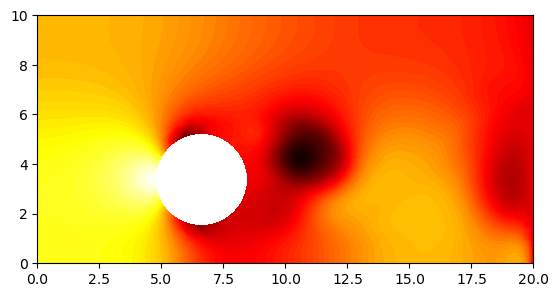

In [186]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.tricontourf(triangulation,data['p'], cmap = 'hot', levels=100)
plt.show()

In [187]:
# plt.tripcolor(triangulation,data['p'], cmap = 'hot')

In [188]:
from matplotlib.tri import CubicTriInterpolator

In [189]:
interpolator_ux = CubicTriInterpolator(dummy_triang, data['ux'])
interpolator_uy = CubicTriInterpolator(dummy_triang, data['uy'])

In [190]:
(duxdx, duxdy) = interpolator_ux.gradient(dummy_triang.x, dummy_triang.y)
(duydx, duydy) = interpolator_uy.gradient(dummy_triang.x, dummy_triang.y)

Text(0.5, 1.0, 'Divergence')

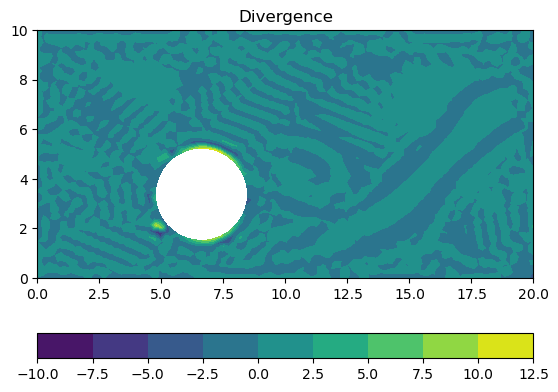

In [191]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
tcf  = ax.tricontourf(triangulation, duxdx + duydy)
plt.colorbar(tcf, orientation="horizontal")
plt.title('Divergence')

In [194]:
(np.linalg.norm(duxdx+duydy)**2)/len(duxdx)

0.7543727347217348

Text(0.5, 1.0, 'Vorticity')

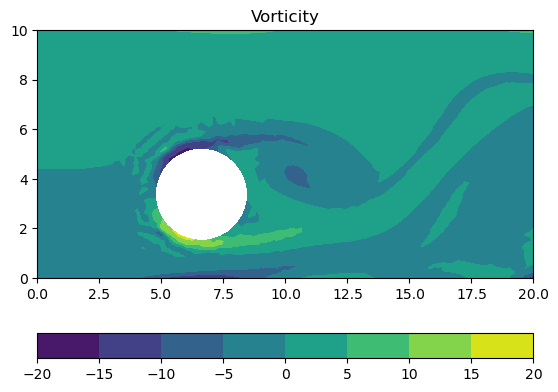

In [193]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
tcf  = ax.tricontourf(triangulation, duydx - duxdy)
plt.colorbar(tcf, orientation="horizontal")
plt.title('Vorticity')

In [195]:
(np.linalg.norm(duydx - duxdy)**2)/len(duxdx)

7.364810380629167